EN3160 - Image Processing and Machine Vision
Electronic and Telecommunication Engineering 
University of Moratuwa
A.D.U. Dilhara
200128D

Question1

51
100
105
256


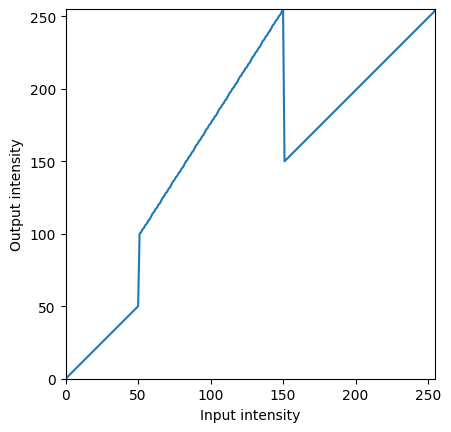

Text(0.5, 1.0, 'Transformed')

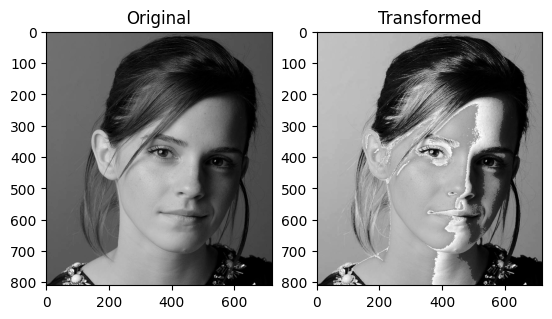

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

points = np.array([(50,50),(50,100),(150,255),(150,150)])
t1 = np.linspace(0,points[0,1],points[0,0]+1).astype('uint8')
print(len(t1))
t2 = np.linspace(points[1,1],points[2,1],points[2,0]-points[1,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(points[3,1],255,255-points[3,0]).astype('uint8')
print(len(t3))
transform = np.concatenate((t1,t2),axis=0)
transform = np.concatenate((transform,t3),axis =0)
print(len(transform))
fig,ax1 = plt.subplots()
ax1.plot(transform)
ax1.set_xlim(0,255)
ax1.set_ylim(0,255)
ax1.set_aspect('equal')
ax1.set_xlabel("Input intensity")
ax1.set_ylabel("Output intensity")
plt.show()



fig,ax2 = plt.subplots(1,2)
img_ori = cv.imread("emma.jpg",0)
ax2[0].imshow(img_ori, cmap='gray')
ax2[0].set_title("Original")

img_trans = cv.LUT(img_ori,transform)
ax2[1].imshow(img_trans, cmap='gray')
ax2[1].set_title("Transformed")


Question2

151
50
55
256


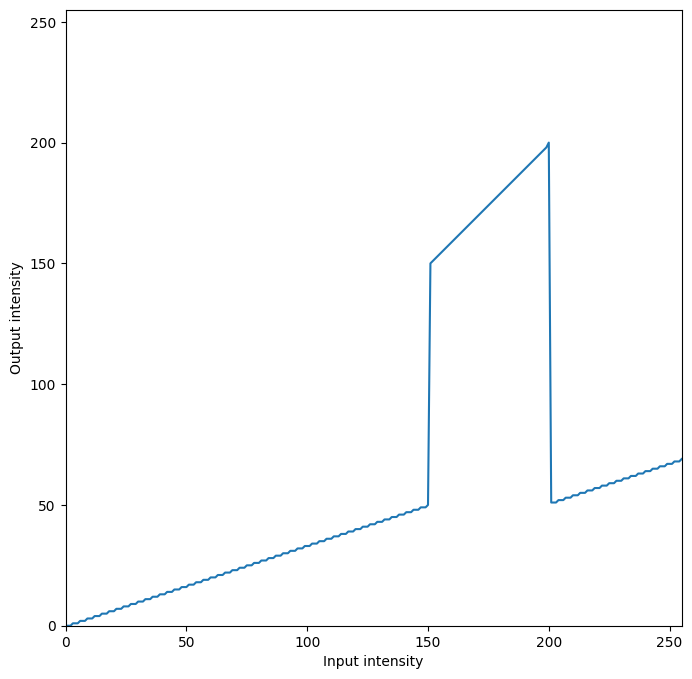

True

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0, 50, 150-0+1).astype('uint8')
print(len(t1))

t2 = np.linspace(150, 200, 200-150).astype('uint8')
print(len(t2))

t3 = np.linspace(51, 69, 255 - 200).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

print(len(transform))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('gray_incr.png')
plt.show()

img_orig = cv.imread('./BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Garish_Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imwrite('Q2_Grayish_Image.jpg', image_transformed)

201
55
256


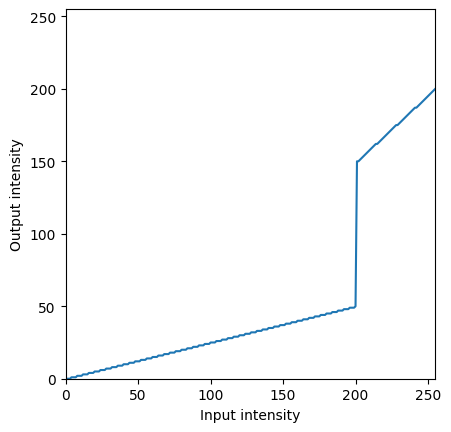

True

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0, 50, 200-0+1).astype('uint8')
print(len(t1))

t2 = np.linspace(150, 200, 255-200).astype('uint8')
print(len(t2))



transform = np.concatenate((t1, t2), axis=0).astype('uint8')


print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('white_incr.png')
plt.show()

img_orig = cv.imread('./BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Whitish_Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imwrite('Q2_Whitish_Image.jpg', image_transformed)

Question3

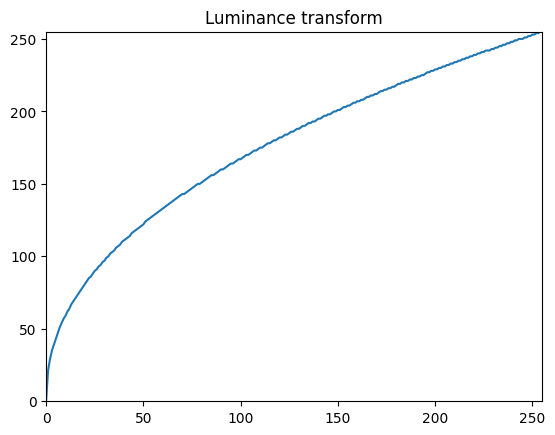

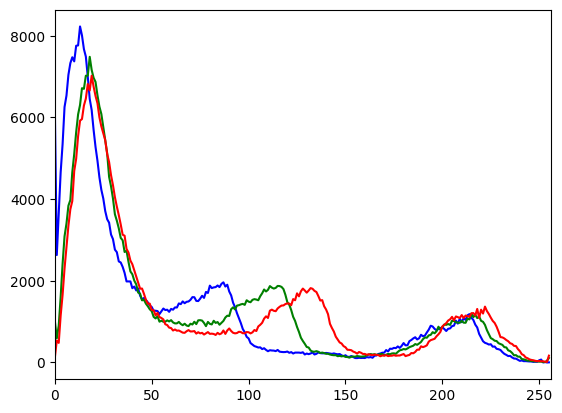

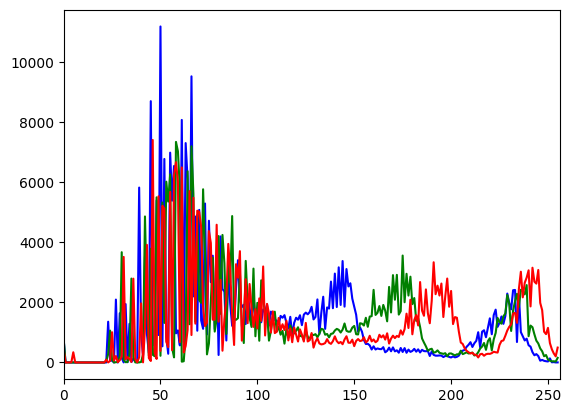

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math


def imshow(name, img1):
    cv.imshow(name,img1)
    cv.waitKey(0)
    cv.destroyAllWindows()

image = cv.imread("highlights_and_shadows.jpg",1)
gamma =0.45
f = lambda x: min(((x/255)**gamma*255),255)
#table = np.array([(i/255)**gamma*255 for i in np.arange(0,256)]).astype('uint8')

image_Lab = cv.cvtColor(image, cv.COLOR_BGR2Lab)

imshow("Original image",image)
cv.imwrite("Q3_Original image.jpg",image)


# Split the HSV image into its components
L, a, b = cv.split(image_Lab)

L_trans= np.round(np.vectorize(f)(L)).astype('uint8')


image_Lab[:,:,0] = L_trans
image_trans = cv.cvtColor(image_Lab, cv.COLOR_Lab2BGR)
imshow("Transformed Image",image_trans)
cv.imwrite("Q3_Luminance transforemd image.jpg", image_trans)

x = np.arange(0,256,1)
y = np.round(np.vectorize(f)(x))
fig,ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_title("Luminance transform")
plt.show()

color = ( 'b','g','r' )
for i, c in enumerate(color):
  hist = cv.calcHist([image], [i], None, [256], [0,256])
  plt.plot ( hist , color = c )
  plt.xlim ([0 , 256  ])
plt.show( )

color = ( 'b','g','r' )
for i, c in enumerate(color):
  hist = cv.calcHist([image_trans], [i], None, [256], [0,256])
  plt.plot ( hist , color = c )
  plt.xlim ([0 , 256  ])
plt.show( )

Question4

In [146]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

alpha=0.55

f=lambda x: min(x + alpha*128*math.exp(-(x-128)**2/(2*70**2)),255)

def imshow(name, img1):
    cv.imshow(name,img1)
    cv.waitKey(0)
    cv.destroyAllWindows()

image = cv.imread("spider.png",1)

image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

imshow("Original image",image)
cv.imwrite("Q4_Original image.jpg",image)
#imshow("HSV image",image_hsv)

# Split the HSV image into its components
hue, saturation, value = cv.split(image_hsv)
#imshow("Hue plane",hue)
#imshow("Saturation palne",saturation)
#imshow("Value plane", value)

saturation_trans= np.round(np.vectorize(f)(saturation)).astype('uint8')
#print(saturation)
#print(saturation_trans)

image_hsv[:,:,1] = saturation_trans
image_trans = cv.cvtColor(image_hsv, cv.COLOR_HSV2BGR)
imshow("Transformed Image",image_trans)
cv.imwrite("Q4_Saturation transforemd image.jpg", image_trans)



True

Question5

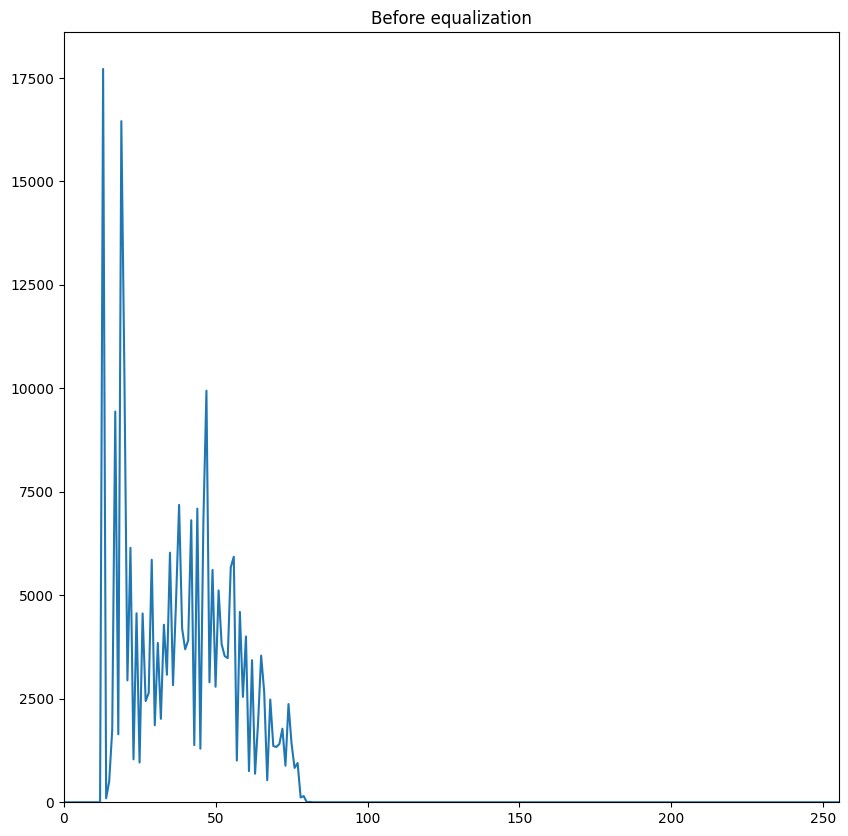

C:\Users\Rasula\AppData\Local\Temp\ipykernel_35536\1218998589.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cdf[i] = sum(pdf[0:i+1])


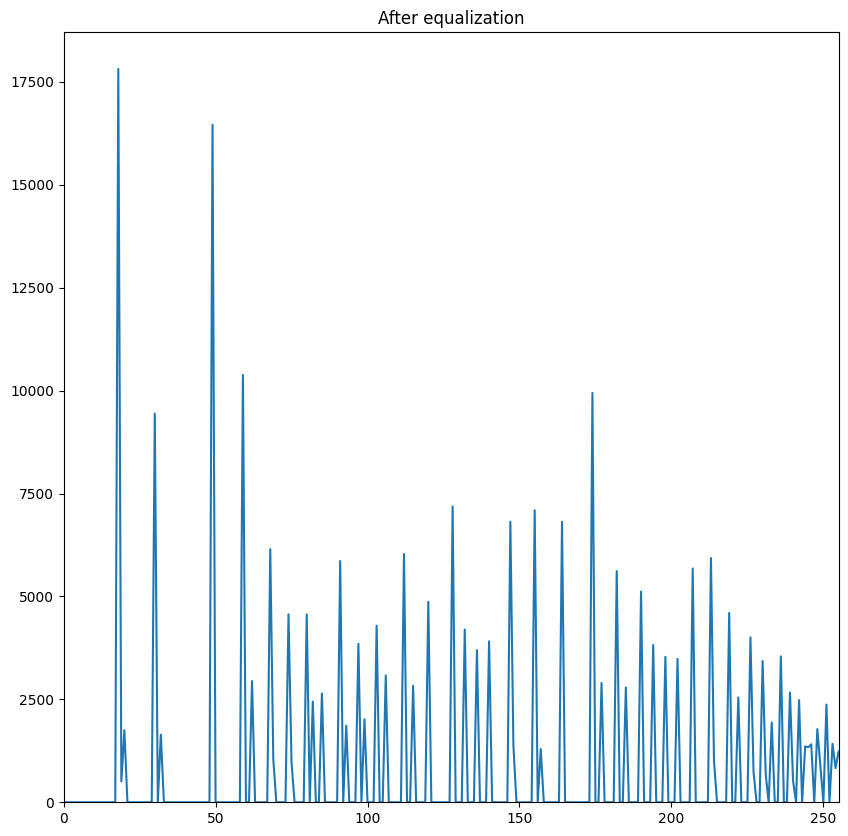

True

In [104]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def imshow(name, img1):
    cv.imshow(name,img1)
    cv.waitKey(0)
    cv.destroyAllWindows()

def graylevel_eq(hist):
    f1 = lambda x: x/sum(hist)
    pdf= np.vectorize(f1)(hist)
    cdf = np.zeros(len(hist))

    for i in range(len(hist)):
        cdf[i] = sum(pdf[0:i+1])

    f2 = lambda x: x*(len(hist)-1)
    graylevel_new = np.vectorize(f2)(cdf)
    graylevel_new = np.round(graylevel_new).astype('uint8')
    return graylevel_new

image_ori = cv.imread("shells.tif", 0)

#histogram of original image
histogram = cv.calcHist([image_ori],[0],None,[256],[0,256])
plt.figure(figsize=(10, 10))
plt.plot(histogram.flatten())
plt.xlim([0,255])
plt.ylim(0)
plt.title("Before equalization")
plt.show()

equalized_graylevel = graylevel_eq(histogram)
#print(equalized_graylevel)

#histogram of euqalized image
image_eq = cv.LUT(image_ori,equalized_graylevel)
histogram1 = cv.calcHist([image_eq],[0],None,[256],[0,256])
plt.figure(figsize=(10, 10))
plt.plot(histogram1.flatten())
plt.xlim([0,255])
plt.ylim(0)
plt.title("After equalization")
plt.show()

imshow("Original image",image_ori)
cv.imwrite("Q5_original_image.jpg",image_ori)

imshow("Equalized image",image_eq)
cv.imwrite("Q5_equalized_image.jpg",image_eq)


Question6

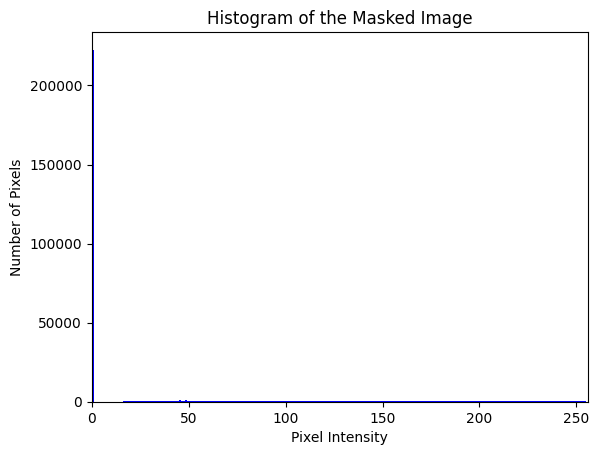

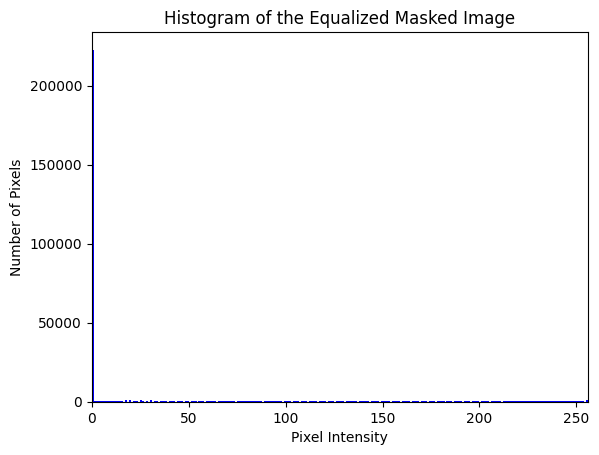

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('./jeniffer.jpg')

scale_percent = 0.2  # percent of original size
width = int(image.shape[1] * scale_percent)
height = int(image.shape[0] * scale_percent)
dim = (width, height)

# resize image
resized = cv.resize(image, dim, interpolation=cv.INTER_AREA)

# Convert the image to HSV color space
hsv_image = cv.cvtColor(resized, cv.COLOR_BGR2HSV)

# Split the HSV image into components
hue, saturation, value = cv.split(hsv_image)
# threshold saturation image
thresh1 = cv.threshold(saturation, 11, 255, cv.THRESH_BINARY)[1]
for_grnd = cv.bitwise_and(value, thresh1)
plt.hist(for_grnd.flatten(), 256, [0, 256], color='b')
plt.xlim([0, 256])
plt.title('Histogram of the Masked Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.show()
cv.imshow('for_grnd', for_grnd)
cv.imwrite('Q6_for_grnd.jpg', for_grnd)

cv.imshow('hue', hue)
cv.imshow('saturation', saturation)
cv.imshow('value', value)
cv.imwrite('Q6_hue_jen.jpg', hue)
cv.imwrite('Q6_saturation_jen.jpg', saturation)
cv.imwrite('Q6_value_jen.jpg', value)




hist, bins = np.histogram(for_grnd.ravel(), 256, [0, 256])
cdf = hist.cumsum()

equ = cv.equalizeHist(for_grnd)
plt.hist(equ.flatten(), 256, [0, 256], color='b')
plt.xlim([0, 256])
plt.title('Histogram of the Equalized Masked Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.show()
cv.imshow('foreground', equ)
cv.imwrite('Q6_for_grnd_eq.jpg', equ)

bak_grnd = value.copy()-for_grnd.copy()
processed_img = equ.copy()+bak_grnd.copy()
cv.imshow('processed_image', processed_img)
cv.imwrite('Q6_processed_image.jpg', processed_img)


cv.waitKey(0)
cv.destroyAllWindows()

Question7

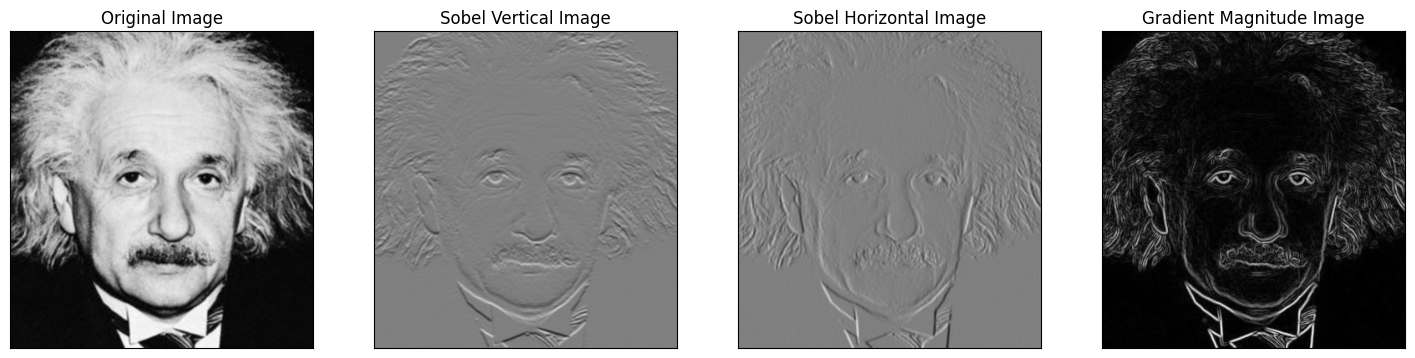

In [5]:
img6 = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img6 is not None

# Sobel Vertical Kernel
sobel_ver = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
img_x = cv.filter2D(img6, -1, sobel_ver)

# Sobel Horizontal Kernel
sobel_hor = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
img_y = cv.filter2D(img6, -1, sobel_hor)

# Gradient Magnitude Kernel
img_grad = np.sqrt(img_x**2 + img_y**2)

# Plot original image
fig,ax = plt.subplots(1,4,figsize = (18,6))
ax[0].imshow(img6, cmap = 'gray',vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[1].imshow(img_x, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[1].set_title("Sobel Vertical Image")
ax[2].imshow(img_y, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[2].set_title("Sobel Horizontal Image")
ax[3].imshow(img_grad, cmap = 'gray')
ax[3].set_title("Gradient Magnitude Image")

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

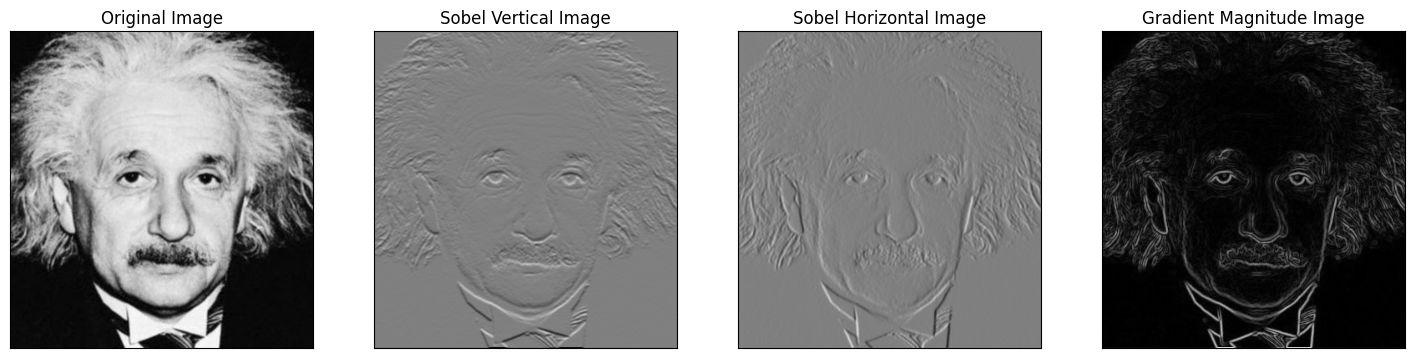

In [7]:
img6_m = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img6_m is not None

# Sobel Vertical Kernel
sobel_ver_m = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
# Sobel Horizontal Kernel
sobel_hor_m = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)

img_xm = np.zeros(img6_m.shape)
img_ym = np.zeros(img6_m.shape)
rows, columns = img6_m.shape

# Carry out padding
padding = 0
padded = np.full((rows + 2, columns + 2), padding, dtype=np.uint8)

# copy img image into center of result image
padded[1:rows + 1, 1:columns + 1] = img6_m

for i in range(rows):
    for j in range(columns):
        img_ym[i,j] = np.sum(np.multiply(sobel_hor_m, padded[i:i + 3, j:j + 3]))
        
for i in range(rows):
    for j in range(columns):
        img_xm[i,j] = np.sum(np.multiply(sobel_ver_m, padded[i:i + 3, j:j + 3]))
              
# Gradient Magnitude Kernel
img_grad_m = np.sqrt(img_xm**2 + img_ym**2)

# Plot original image
fig,ax = plt.subplots(1,4,figsize = (18,6))
ax[0].imshow(img6_m, cmap = 'gray',vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[1].imshow(img_xm, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[1].set_title("Sobel Vertical Image")
ax[2].imshow(img_ym, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[2].set_title("Sobel Horizontal Image")
ax[3].imshow(img_grad_m, cmap = 'gray')
ax[3].set_title("Gradient Magnitude Image")

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

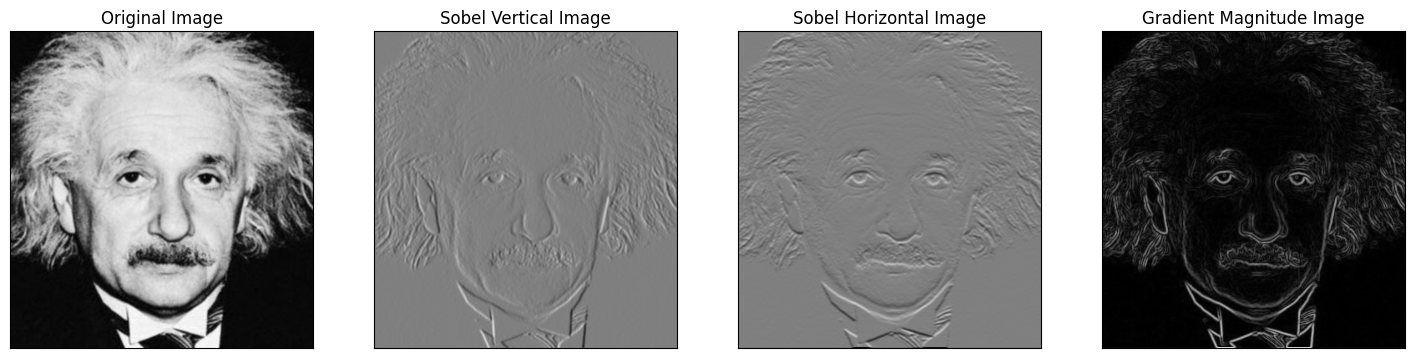

In [8]:
import scipy.signal as sig

# Importing the image
img6_p = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img6_p is not None

img_xp_1 = np.zeros(img6_p.shape) # Intermediate Image
img_xp = np.zeros(img6_p.shape)   # Final Image
img_yp_1 = np.zeros(img6_p.shape)
img_yp = np.zeros(img6_p.shape)

# Sobel Vertical Kernel
sobel_ver_array1 = np.array([[1],[2],[1]])
sobel_ver_array2 = np.array([[1,0,-1]])

# Sobel Horizontal Kernel
sobel_hor_array1 = np.array([[1],[0],[-1]])
sobel_hor_array2 = np.array([[1,2,1]])

img_xp_1 = sig.convolve2d(img6_p, sobel_ver_array1, mode="same")
img_xp = sig.convolve2d(img_xp_1, sobel_ver_array2, mode="same")
img_yp_1 = sig.convolve2d(img6_p, sobel_hor_array1, mode="same")
img_yp = sig.convolve2d(img_yp_1, sobel_hor_array2, mode="same")
        
# Gradient Magnitude Kernel
img_grad_p = np.sqrt(img_xp**2 + img_yp**2)

# Plot original image
fig,ax = plt.subplots(1,4,figsize = (18,6))
ax[0].imshow(img6_p, cmap = 'gray',vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[1].imshow(img_xp, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[1].set_title("Sobel Vertical Image")
ax[2].imshow(img_yp, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[2].set_title("Sobel Horizontal Image")
ax[3].imshow(img_grad_p, cmap = 'gray')
ax[3].set_title("Gradient Magnitude Image")

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

Question8

In [220]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_small = cv.imread("./zooming/im01small.png",1)
image = cv.imread("./zooming/im01.png")


zooming_factor = 4

def nearest_neighbor(img, zoom):
    rows = img.shape[0]*zoom
    colums = img.shape[1]*zoom
    planes = img.shape[2]
    zoomed = np.zeros((rows,colums,planes), dtype =np.uint8)
    for i in range(0,rows):
        for j in range(0,colums):
                zoomed[i,j] =  img[int(i/zoom),int(j/zoom)]
    return zoomed

def zoom_bilinear_interpolation( image,scale=4):
    rows = int(scale*image.shape[0])
    columns = int(scale*image.shape[1])
    zoomed = cv.resize(image,(columns,rows),interpolation = cv.INTER_LINEAR)
    return zoomed

cv.imshow("Small_image",image_small)
cv.imwrite("Q8_small_image.jpg",image_small)

nearest_zoomed = nearest_neighbor(image_small,zooming_factor)
cv.imshow("Nearest_neighbor_zoomed",nearest_zoomed)
cv.imwrite("Q8_Nearest_neighbor_zoomed.jpg",nearest_zoomed)

bilinear_zoomed = zoom_bilinear_interpolation(image_small,zooming_factor)
cv.imshow("Bilinear_interpolation_zoomed",bilinear_zoomed)
cv.imwrite("Q8_Bilinear_interpolation_zoomed.jpg",bilinear_zoomed)

cv.waitKey(0)
cv.destroyAllWindows()

ssd_1 = np.sum(((image[:,:]-nearest_zoomed[:,:])**2)/(3*255**2))/(image.shape[0]*image.shape[1])
ssd_2 = np.sum(((image[:,:]-bilinear_zoomed[:,:])**2)/(3*255**2))/(image.shape[0]*image.shape[1])

print(ssd_1)
print(ssd_2)

0.0004811121335890121
0.0004775562417232688


nearest_neighbor

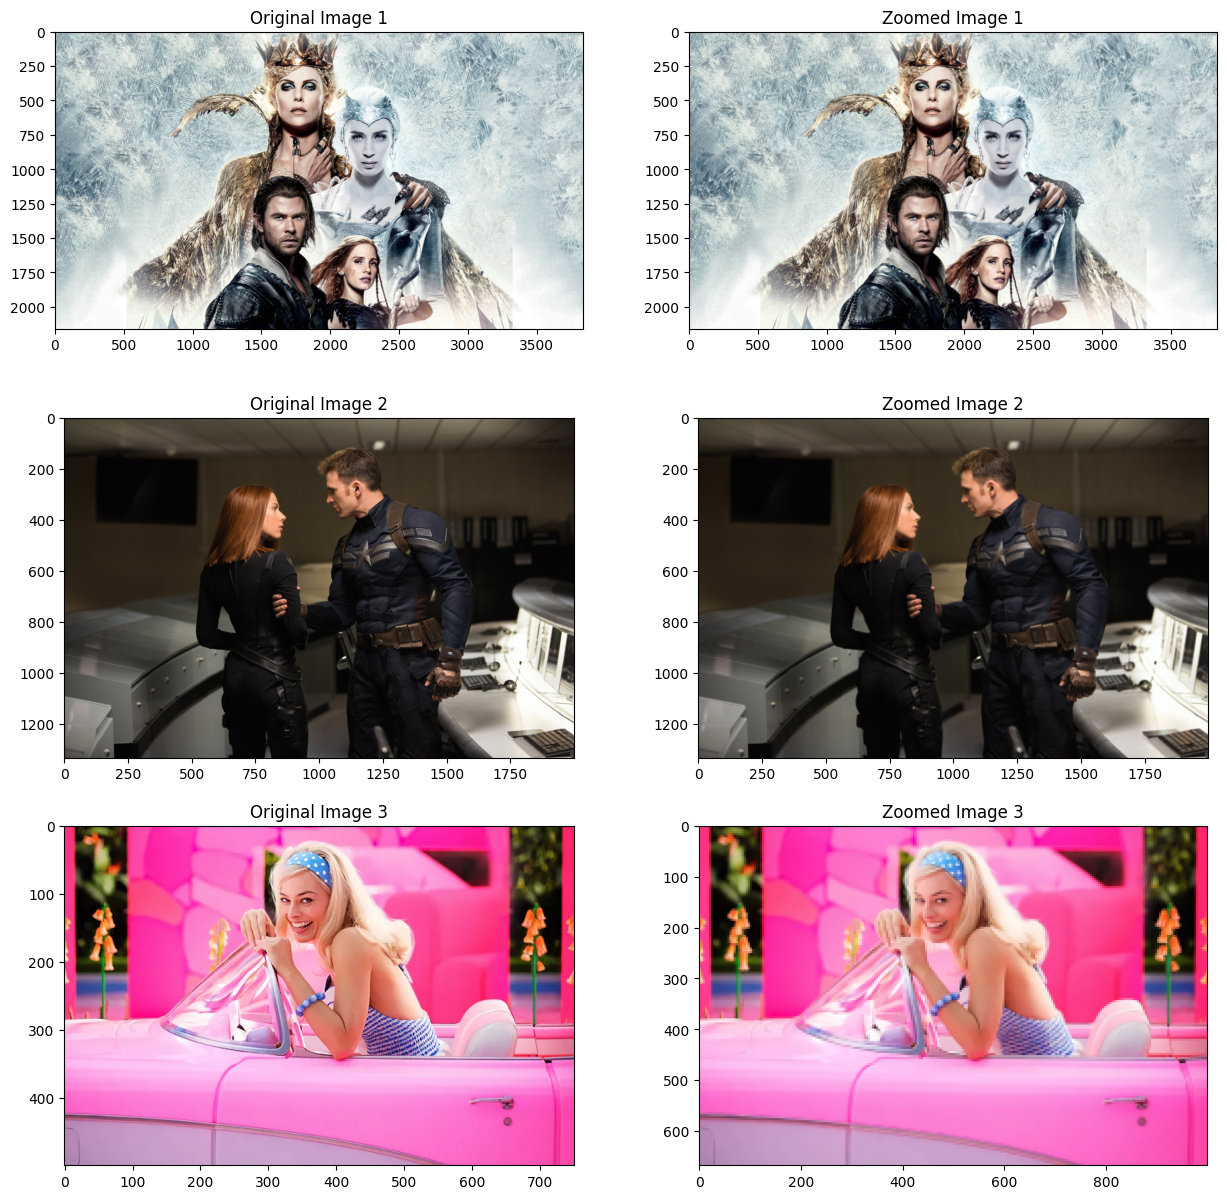

In [215]:
image_small4 = cv.imread("./zooming/im04small.png",1)
image4 = cv.imread("./zooming/im04.png")

image_small8 = cv.imread("./zooming/im08small.png",1)
image8 = cv.imread("./zooming/im08.png")

image_small11 = cv.imread("./zooming/im11small.png",1)
image11 = cv.imread("./zooming/im11.png")

fig,ax = plt.subplots(3,2, figsize = (15,15))

ax[0,0].imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
ax[0,0].set_title("Original Image 1")
ax[0,1].imshow(cv.cvtColor(nearest_neighbor(image_small4,zooming_factor), cv.COLOR_BGR2RGB))
ax[0,1].set_title("Zoomed Image 1")

ax[1,0].imshow(cv.cvtColor(image8, cv.COLOR_BGR2RGB))
ax[1,0].set_title("Original Image 2")
ax[1,1].imshow(cv.cvtColor(nearest_neighbor(image_small8,zooming_factor), cv.COLOR_BGR2RGB))
ax[1,1].set_title("Zoomed Image 2")

ax[2,0].imshow(cv.cvtColor(image11, cv.COLOR_BGR2RGB))
ax[2,0].set_title("Original Image 3")
ax[2,1].imshow(cv.cvtColor(nearest_neighbor(image_small11,zooming_factor), cv.COLOR_BGR2RGB))
ax[2,1].set_title("Zoomed Image 3")
plt.show()

bilinear_interpolation

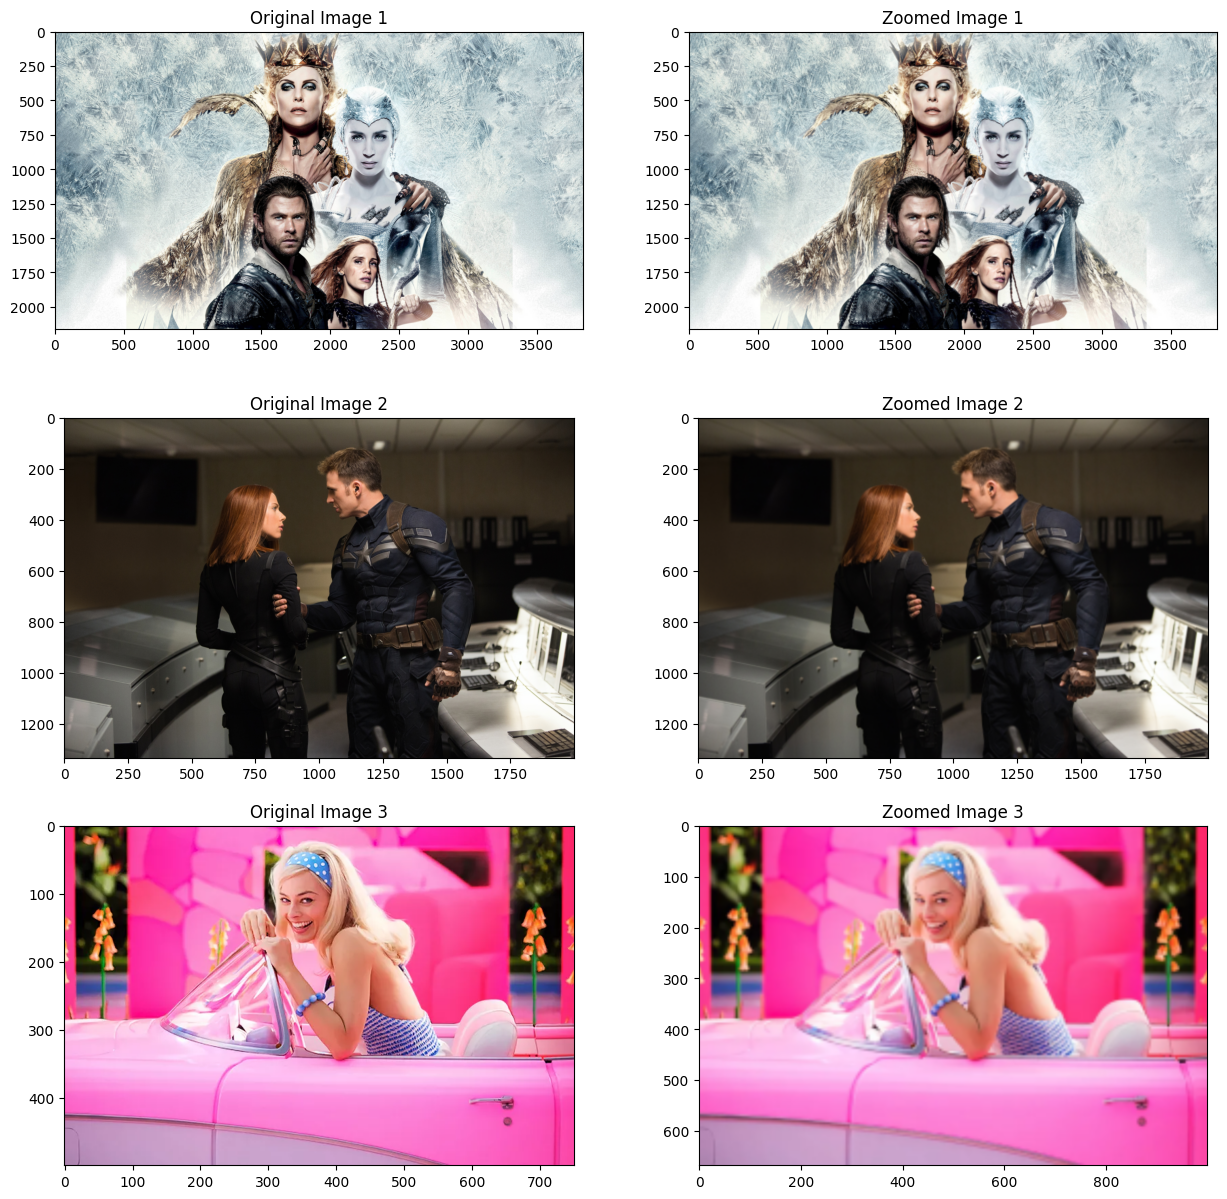

In [221]:


fig,ax = plt.subplots(3,2, figsize = (15,15))

ax[0,0].imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
ax[0,0].set_title("Original Image 1")
ax[0,1].imshow(cv.cvtColor(zoom_bilinear_interpolation(image_small4,zooming_factor), cv.COLOR_BGR2RGB))
ax[0,1].set_title("Zoomed Image 1")

ax[1,0].imshow(cv.cvtColor(image8, cv.COLOR_BGR2RGB))
ax[1,0].set_title("Original Image 2")
ax[1,1].imshow(cv.cvtColor(zoom_bilinear_interpolation(image_small8,zooming_factor), cv.COLOR_BGR2RGB))
ax[1,1].set_title("Zoomed Image 2")

ax[2,0].imshow(cv.cvtColor(image11, cv.COLOR_BGR2RGB))
ax[2,0].set_title("Original Image 3")
ax[2,1].imshow(cv.cvtColor(zoom_bilinear_interpolation(image_small11,zooming_factor), cv.COLOR_BGR2RGB))
ax[2,1].set_title("Zoomed Image 3")
plt.show()

Question9

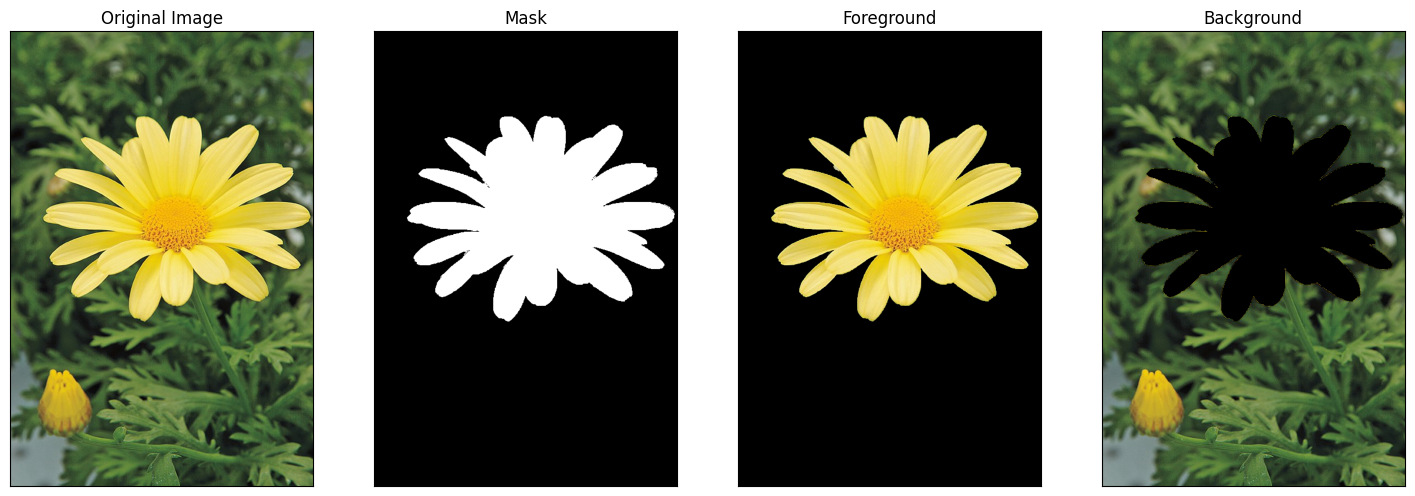

In [226]:
img7 = cv.imread('flower.jpg', cv.IMREAD_ANYCOLOR)


mask = np.zeros(img7.shape[:2], dtype="uint8") # Mask - an empty image to store the mask
rect = (40, 150, 560, 500) # Defining the rectangle that contains the object

fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")

# Apply GrabCut using the the bounding box segmentation method
(mask, bgModel, fgModel) = cv.grabCut(img7, mask, rect, bgModel, fgModel, 5, mode=cv.GC_INIT_WITH_RECT)

# Mask for the foreground
fore_mask = (mask == cv.GC_PR_FGD).astype("uint8") * 255
outputMask_fore = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD), 0, 1)
outputMask_fore = (outputMask_fore * 255).astype("uint8")
foreground = cv.bitwise_and(img7, img7, mask=outputMask_fore) # Foreground Image

# Mask for the background
back_mask = (mask == cv.GC_PR_BGD).astype("uint8") * 255
outputMask_back = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 0, 1)
outputMask_back = (outputMask_back * 255).astype("uint8")
background = cv.bitwise_and(img7, img7, mask=outputMask_back) # Background Image

# Plot original image
fig,ax = plt.subplots(1,4,figsize = (18,6))
ax[0].imshow(cv.cvtColor(img7, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(fore_mask, cv.COLOR_BGR2RGB))
ax[1].set_title("Mask")
ax[2].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground")
ax[3].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
ax[3].set_title("Background")

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

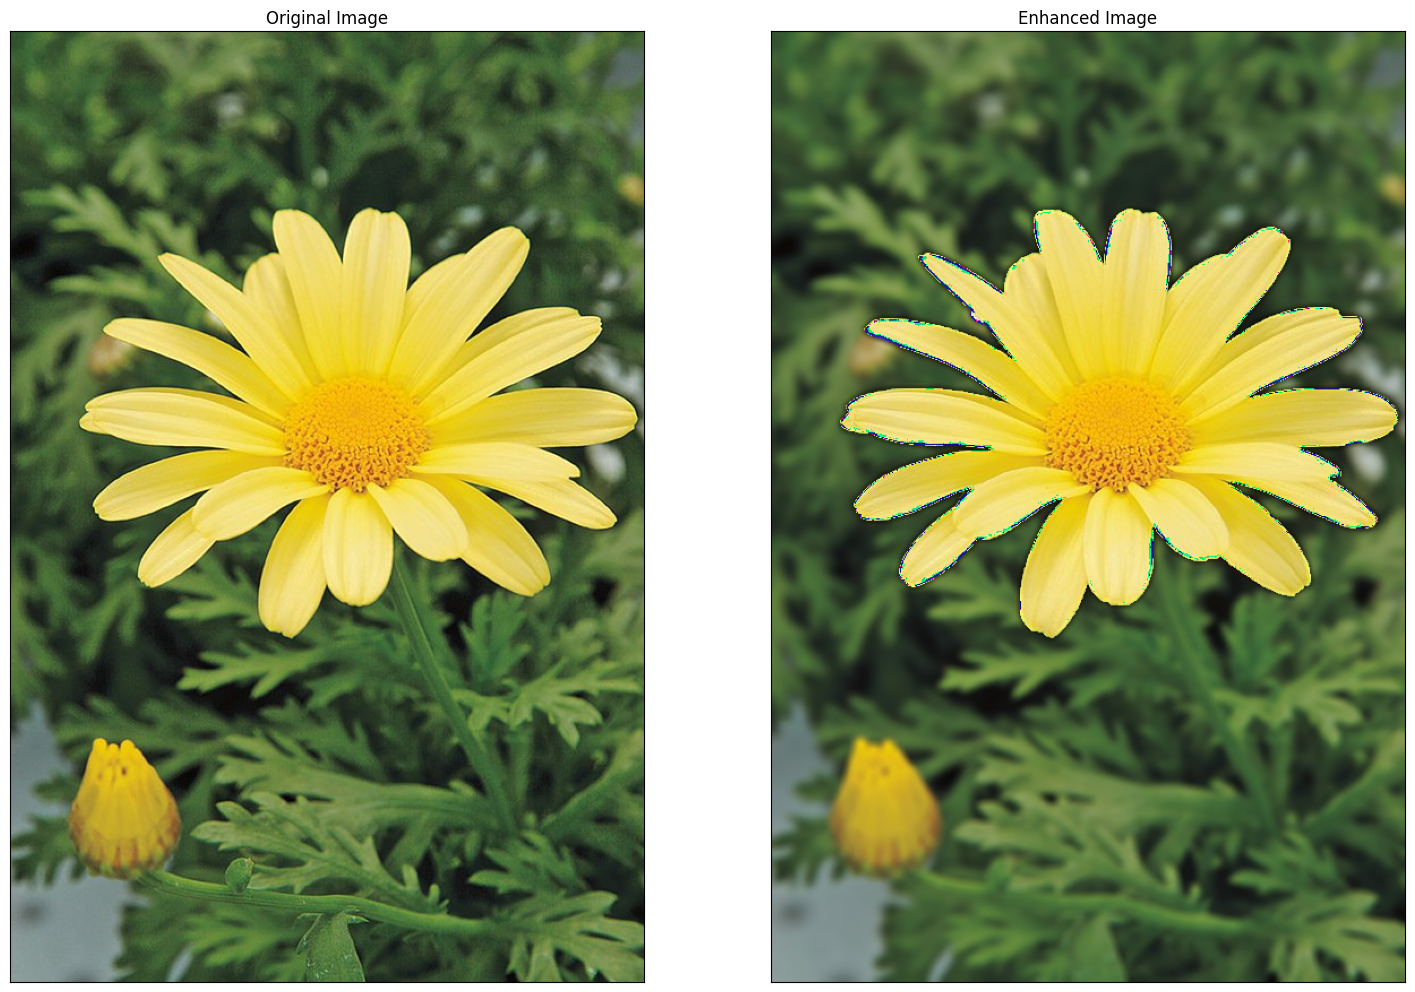

In [227]:
enhanced = np.clip(np.add(foreground, cv.GaussianBlur(background, (9,9), 4)), 0, 255)
# enhanced = np.clip(np.add(foreground,background), 0, 255)

# Plot original image
fig,ax = plt.subplots(1,2,figsize = (18,18))
ax[0].imshow(cv.cvtColor(img7, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")

for i in range(2):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()
